# Team Members: Ju Mong Ko (jk2299), Minchul Kim (mk859), Allen Park (ahp59)

# <font color="blue">1. Introduction</font>

### 1-A. Research Context

This past year has been defined by the life-changing virus COVID-19. It has affected us and the entire world so drastically from changing entire countries safety policies to altering everyday life and routine. This pandemic has forced many to stay home for longer then they have ever been in their entire lives. This led our group to think: What might/did bring the most entertainment while no one was allowed to go outside? Netflix. Ever since Netflix was made, it has been used across the world, bringing ad-free TV to any device. Because live sports and movie productions were heavily restricted, we believed there would be a surge in Netflix' revenue. Since both COVID and Netflix have had significant effects on our generation, we believed it would be interesting how those had affected each other.

### 1-B. Research Question

We would like to conduct our data science research around the following question: <br><br>
```How did the novel covonavirus pandemic affect Netflix's business in terms of time spent on Netflix and its revenue? (change in subscribers, revenue, stock prices, contents)```

### 1-C. Main Findings

- The relationship between daily COVID cases and regional mobility in the US is a high negative correlation. This means as daily COVID cases increase, mobility is decreasing.
- Mobility and Netflix Google Search Trends have a negatively correlated relationship also. As mobility decreased the number of Netflix searches in Google increased.
- Upon doing some research, we found that Netflix Google Search Trends were a surprisingly good predictor of increase in Netflix subscribers.
- Since Netflix is an ad-free streaming service, we know that the majority of their revenue stems from their subscriber base. By graphing the relationship and calculating correlation, we proved this relationship.

### 1-D. Brief Summary of Results

The COVID daily cases when graphed against mobility showed a negative correlation. In addition to that, we found the negative correlation between mobility and Google Search Trends. Through this connection we could say that the COVID daily cases were correlated to the Google Search Trends of Netflix. We also show the very high correlation between Netflix quarterly subscribers and their quarterly revenue. By referencing multiple articles, we said that the Google Search Trends for Netflix were a good predictor of increased subscriber count. Finally we connected all the piece together, making the conclusion that daily COVID cases would have an effect on Netflix' revenue.

# <font color="blue">2. Data Description</font>

### 2-A. Data Collection

In terms of evaluating the impacts of the coronavirus on the companies, we will utilize both internal and external data as indicators, and they are from the following sources:<br>
- Netflix Subscribers & Revenue: www.comparitech.com
- USA Daily COVID-19: www.kaggle.com
- USA Regional Mobility: www.google.com/covid19/mobility
- Average Screen-Time (Data surveyed from approximately 900 parents with children): Morning Consult National Tracking Poll #200858
- Google Search Trends - Netflix: https://trends.google.com/trends/?geo=US

For datasets from **www.kaggle.com**, we downloaded the formatted datasets directly.<br>
For datasets from **www.google.com/covid/mobility**, we exported the worldwide dataset csv folder, and picked out the dataset relevant to the United States. <br> 
For datasets from **www.comparitech.com** and the **Morning Consult National Tracking Poll**, we first converted them into excel files and then exported into csv files to that we can analyze.
For datasets from **https://trends.google.com/trends/**, we customized the time range and exported the dataset into a csv file.

### 2-B. Data Cleaning

All data cleaning process is documented in the **"INFO2950 Project Appendix - Data Cleaning"** file.<br>

**The following are datasets ready for analysis, after collection & cleaning procecss:**
- **df_subscribers** : Netflix Subscribers
- **df_revenue** : Netflix Revenue
- **df_covid**: USA Daily COVID-19
- **df_mobility** : USA Regional Mobility
- **df_screentime** : Average Screen-Time
- **df_googlesearch** : Google Search Trends - Netflix

In [232]:
#Import Necessary Python Packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import statistics
from scipy.stats import pearsonr, ttest_ind 
from sklearn.linear_model import LinearRegression

In [233]:
df_subscribers = pd.read_csv("dataset/df_subscribers.csv")
df_revenue = pd.read_csv("dataset/df_revenue.csv")
df_covid = pd.read_csv("dataset/df_covid.csv")
df_mobility = pd.read_csv("dataset/df_mobility.csv")
df_screentime = pd.read_csv("dataset/df_screentime.csv")
df_googlesearch = pd.read_csv("dataset/df_googlesearch.csv")

### 2-C. Data Description

**What are the observations (rows) and the attributes (columns)?**
- Netflix Subscribers
    - The observations are the number of subscribers categorized by location and the attributes are the quarters of a year from 2018 to 2020.
- Netflix Revenue
    - The observations are the amount of total reported revenue categorized by location and the attributes are the quarters of a year from 2018 to 2020.
- USA Daily COVID-19
    - The observations are the number of headcounts categorized by date and the attributes are total test results, positive results, and increased positive results.
- USA Regional Mobility
    - The observations indicate how much mobility deviates from the baseline everyday and the attributes show the different types of mobility.
- Average Screen-Time
    - The observations are the headcount of respondents before and after COVID-19, and the attributes are different time intervals on average screentime.
- Google Search Trends - Netflix
    - The observations are the daily popularities of the search term "Netflix" over the designated time range, and the attributes are Date and Search Popularity. Region is restricted to the United States. According to the Google Search Trends team, "Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

**Why was this dataset created?**
- Netflix Subscribers
    - This dataset was created to demonstrate the change in the number of Netflix subscribers in varied regions every quarter.
- Netflix Revenue
    - This dataset was created to demonstrate the change in Netflix's reported revenue every quarter in different fiscal years.
- USA Daily COVID-19
    - This dataset was created to demonstrate the daily number of COVID-19 test results and positive cases. One of the key takeaways from this dataset is that it shows you how many positive cases increased each day.
- USA Regional Mobility
    - This dataset was created to show the daily change in mobility in the United States. The original purpose of this dataset was to give insight for public health officials.
- Average Screen-Time
    - This dataset was created to show the difference in average screentime from before and after COVID-19.
- Google Search Trends - Netflix
    - This dataset was created by the Google Search Engine to provide anyone an insight into various search trends in different regions and time periods.

**Who funded the creation of the dataset?**
- Kaggle
    - USA Daily COVID-19
- Google
    - USA Regional Mobility
    - Google Search Trends - Netflix
- Comparitech
    - Netflix Subscribers
    - Netflix Revenue
- Morning Consult National Tracking Poll #200858
    - Average Screen-Time

**What preprocessing was done, and how did the data come to be in the form that you are using?**
- Netflix Subscribers/Revenue
    - The creator of this dataset collected data from Netflix's subscriber figures and calculated revenue by using the average revenue gained per subscription.
- USA Daily COVID-19
    - This data came from a GitHub repository called COVID19Tracking.
- USA Regional Mobility
    - These insights were created with "aggregated, anonymized sets of data from users who have turned on the Location History setting."
- Average Screen-Time
    - The creators interviewed parents online, weighing relevant categories (age, gender, educational attainment, race, and region.)
- Google Search Trends - Netflix
    - The data was collected by Google engineers and is available for download in csv form. After downloading as a csv file, we manipulated the indices so that the dataset is optimized for our analysis.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
- Netflix Subscribers/Revenue
    - Netflix officials were not aware of this dataset being created. However, they publicly released number of subscribers and revenue so we can assume that they expected the data to be used for varied purposes.  
- USA Daily COVID-19
    - People being tested were aware that their records are being shared with numerous health organizations, and may be used for research purposes. 
- USA Regional Mobility
    - It is not specifically mentioned how the data was collected for this dataset.
- Average Screen-Time
    - The parents were interviewed and knew that their answers were being used to map average screen-time before and after COVID-19.
- Google Search Trends - Netflix
    - The users of Google Search Engine are involved because this dataset is the actual search trend of users. For users who don't know the existence of Google Search Trends, they might not have been aware that this data is collected. For those who knew, they might have thought the data could be used for research purposes.

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**
- Netflix Subscribers & Revenue
 - https://www.comparitech.com/tv-streaming/netflix-subscribers/
- USA Daily COVID-19
 - https://www.kaggle.com/sudalairajkumar/covid19-in-usa
- USA Regional Mobility
 - https://www.google.com/covid19/mobility/
- Average Screen-Time
 - https://assets.morningconsult.com/wp-uploads/2020/08/26113344/200858_crosstabs_EDUCATION_Parents_v2_LM.pdf
- Google Search Trends - Netflix
 - https://trends.google.com/trends/explore?date=2020-02-15%202020-06-30&geo=US&q=%2Fm%2F017rf_

# <font color="blue">3. Pre-registration Statement</font>

### 3-A. Analysis Logic

How we approached our research question is quite straightforward. We categorized our datasets into three groups listed below, and went through a chain-of-events thought process for our hypotheses. Our main analysis logic is the following: The increase in Daily COVID cases will decrease regional mobility. If mobility decreases, the average screentime will increase accordingly and Google Search Popularity for Netflix will also increase. More people searching Netflix on Google will trigger an increase in Netflix subscribers, which, in turn, will increase the overall company revenue.
- **COVID related data**: Daily COVID cases, Regional Mobility, Google Search Trends - Netflix, and Average Screentime
- **Netflix Product Data**: Netflix quarterly subscribers
- **Netflix Financial Data**: Netflix quarterly revenue

### 3-B. Preregistration of Analysis <br>
The preregistration statements bascially reiterates our analysis logic.

1. Hypothesis: The change in COVID cases, mobility, Google Search Trends on Netflix, and average screentime during the pandemic increased the number of Netflix subscribers.

 We would love to see how the COVID-related data affected Netflix as a product. Our hypothesis is that the tendencies in COVID-related data would have generally contribute to the increase in the number of Netflix subscribers. Due to the pandemic, people would spend more time at home and thus would consume more content with their electronic devices. This would have led to a surge in demand of Netflix because they are the biggest runner in the online streaming market.

2. Hypothesis: Increased number of Netflix subscribers led to an increase in the company revenue.

 Our next hypothesis in the chain-of-events is that increased number of Netflix subscribers led to an increase in the company revenue. As long as Netflix gains more subscribers than they lose, and since subscription fee is the biggest part of their revenue, their revenue increases. Therefore, if the coronavirus had driven an increase in the number of subscribers, Netflix's revenue would have also increased followingly.

### 3-C. Models & Tests for Analysis

1. Linear Regression Model

    We are going to utilize the linear regression model in order to discover potential association between the variables of our interest such as COVID cases, mobility data, subscribers, revenue & stocks. We chose the linear model because (1) we want to investigate if some of our data have a positive linear association with each other, which can later be possibly expanded into a causal relationship (2) acquire an easy-to-visualize statistical outcomes so that we can provide more context in our project (3) furthermore attempt to predict the future values of the outcome variable based on the input variable. This model fits well to our research question because, in our research question, we want to see if covid-related data have affected the netflix related data. 
    <br><br>
2. Statistical analysis using T-test

    In advance, we would like to perform a statistical t-test in order to validify our research outcomes by testing the significance of the target indices. T-test is an excellent method to see if there is statistical confidence or significance between multiple participating data. This test will enhance the credibility of our outcome and may potentially prove causality, giving strength to our argument.
    <br><br>
3. Sklearn package

    We would like to utilize the sklearn train/test data split method in order to further testify the validity of our statistical experiment. One possibility is to build a model that will predict & support our hypothesis and our actual outcome so that we can extend our argument. Using the sklearn package and test/train method would allow us to explore the data we have in more detail that it could allow us to discover any significant relationships between variables that we have previously not thought of.
    <br><br>

# <font color="blue">4. Data Analysis</font>

### 4-A. Exploring Individual Datasets

- ### USA Daily COVID-19

This dataset was acquired to provide a base for all our analysis. We are observing the relationship between COVID cases and Netflix's revenue, and this dataset gives us the daily increase in COVID cases in the US. We decided to cut the data from Feburary 15th, 2020 to May 30th, 2020 because of a variation in the way people reacted to COVID over time. Since we want to look at the general trend "Before COVID" and "After COVID", information before the rise of COVID is not essential. Anything after the initial scare of COVID, where people genuinely were worried and stayed home, is also not as important because it does not help decribe how COVID directly effected the streaming service. Refer to [Limitation 1](#limitations_one) for more detail on how we cut the data and what variations we removed.

Summary Statistics(Daily increase in positive COVID cases in the US)
Min: 0
Max: 35871
Mean: 16730.23
Standard Deviation: 12371.32


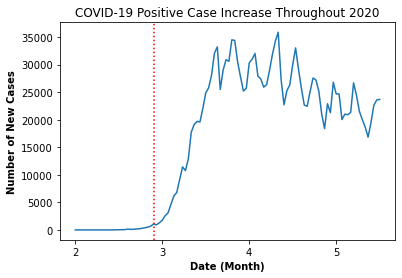

In [234]:
#(1)Sort COVID data in ascending order (2)Filter out dates we are not interested in
df_covid = df_covid.sort_values('date', ascending = True)
df_covid = df_covid[(df_covid['date']>=20200215) & (df_covid['date']<=20200530)]

#Summary Statistics
stat_covid = df_covid['positiveIncrease']
print("Summary Statistics(Daily increase in positive COVID cases in the US)")
print("Min: " + str(stat_covid.min()))
print("Max: " + str(stat_covid.max()))
print("Mean: " + str("{:.2f}".format(stat_covid.mean())))
print("Standard Deviation: " + str("{:.2f}".format(stat_covid.std())))

#Plot
pos = np.arange(len(df_covid['positiveIncrease']))

plt.plot(pos, df_covid['positiveIncrease'], 0.2)
plt.xlabel("Date (Month)",fontweight='bold')
plt.ylabel("Number of New Cases",fontweight='bold')

x_ticks = [2,3,4,5,6]
plt.xticks(range(0,len(df_covid),30), x_ticks)
plt.axvline(27,color='red',linestyle=':')

plt.title("COVID-19 Positive Case Increase Throughout 2020")
plt.show()

<a id='md_march'></a>
The plot above shows the daily positive increase from Feburary 15th to May 30th. The vertical red line is March 13th, the day we decided as the marker for "Before" and "After" COVID. This was taken from analyzing all three datasets, the screentime dataset, COVID increase, and mobility. The screentime dataset classified "Before" and "After" COVID as before March 2020 and after March 2020. Upon a closer look in the COVID and mobility datasets, it was evident that March 13th was the date where the drastic increase/decrease started. This is how we chose March 13th as the date to set the red vertical line too.

- ### Mobility <br><br>
In order to connect increase COVID cases to an increased time at home and in turn a higher chance people subscribed to Netflix, we looked at the mobility index, averaging retail, recreation, transit, and workplace mobilities (Netflix-related mobility data). The data is given in percent increase/decrease. We decided to cut the data from Feburary 15th, 2020 to May 30th, 2020 for this dataset also in order to keep compared data consistent. Since we want to look at the general trend "Before COVID" and "After COVID", information on mobility before the rise of COVID is not essential. Anything after the initial scare of COVID, where people genuinely were worried and stayed home (which is the most influential factor in mobility), is also not as important because it does not help decribe how COVID directly effected the streaming service. Refer to [Limitation 1](#limitations_one) for more detail on how we cut the data and what variations we removed.

Summary Statistics(Percent Change in Average Mobility(USA))
Min: -54.666666666666664
Max: 7.666666666666667
Mean: -27.92
Standard Deviation: 20.09


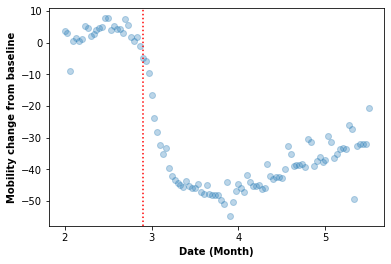

In [235]:
#Filter out dates we are not interested in
df_mobility = df_mobility[df_mobility['date'] <= '2020-05-30']
df_mobility['avg'] = (df_mobility['retail_and_recreation'] + df_mobility['transit_station'] + df_mobility['workplace'])/3

#Plot
x = df_mobility.date
y = df_mobility.avg
plt.xlabel('Date (Month)',fontweight='bold')
plt.ylabel('Mobility change from baseline',fontweight='bold')
plt.scatter(x,y,alpha=0.3)
plt.axvline(27,color='red',linestyle=':')

x_ticks = [2,3,4,5,6]
plt.xticks(range(0,len(df_mobility),30), x_ticks)

#Summary Statistics
stat_mob = df_mobility["avg"]
print("Summary Statistics(Percent Change in Average Mobility(USA))")
print("Min: " + str(stat_mob.min()))
print("Max: " + str(stat_mob.max()))
print("Mean: " + str("{:.2f}".format(stat_mob.mean())))
print("Standard Deviation: " + str("{:.2f}".format(stat_mob.std())))

The plot above represents the percent change in mobility from the baseline before COVID (shown at 0 on the Y-axis). There is obvious decrease in mobility after the red vertical line. This red line is March 13th. We decided this with the same reasoning as [above.](#md_march) Although the mobility never reaches baseline again, there is an increase after the initial announcement of COVID. This is why we decided to take a sample of the huge dataset to narrow down the period in time that COVID would have the greatest effect, the start of the pandemic. <br><br>

- ### Screentime <br><br><a id='average_screentime'></a>
Since we are observing Netflix, we thought having some data on average screen-time would be very useful. This dataset depicts how the average screentime for young generations (which is the heaviest subscriber base for streaming platforms) shifted from before COVID to after COVID. This dataset classified before COVID as before March and after COVID as after March, but we arbitrarily assigned March 13th as the split. That was the date that a consistent change really started to show between the three dataset. A possible downside to this dataset is that it a sample of 899 people, which may not speak for the entire population. Refer to [Limitation 2.](#limitations_two)

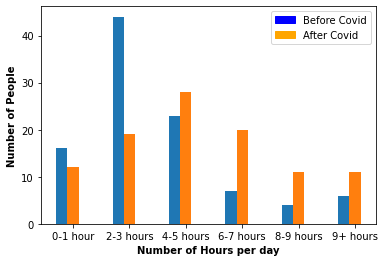

In [236]:
#Specify Data for Before & After COVID
before_covid = df_screentime.loc[0]
after_covid = df_screentime.loc[1]

#Plot
width = 0.2
pos1 = np.arange(len(before_covid))
pos2 = [x + width for x in pos1]

plt.bar(pos1, before_covid, width)
plt.bar(pos2, after_covid, width)

plt.xlabel('Number of Hours per day', fontweight='bold')
plt.xticks([x + width for x in range(len(before_covid))], df_screentime.columns)
plt.ylabel('Number of People',fontweight='bold')

blue = patch.Patch(color="blue", label="Before Covid")
orange = patch.Patch(color="orange", label="After Covid")

plt.legend(handles=[blue, orange])
plt.show()

As you can see in the graph, the target population tended to spend 2-3 hours per day before COVID-19. However, the screentime spread out to higher number of hours after the pandemic. The number of 0-1 hour and 2-3 hours decreased, but all higher hour increased. This proves that there was a general increase in screentime after COVID arose.

- ### Google Search Trends - Netflix <br><br><a id='google_netflix'></a>
Since we want to know how people became more interested in Netflix after the coronavirus pandemic, we thought it would be a good idea to look into Google Search Trends on the term "Netflix." Google is a search engine in which the majority of people in North America use on a daily basis. If the popularity of Netflix increased over the course of the first few months of pandemic, it is likely that the phenomenon is reflected in Google Search Trends. 

Summary Statistics(Google Search Trends for the term Netflix scaled from 1 to 100)
Min: 36
Max: 100
Mean: 60.34
Standard Deviation: 14.92


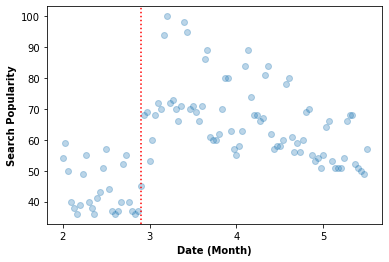

In [237]:
#Plot
plt.xlabel('Date (Month)',fontweight='bold')
plt.ylabel('Search Popularity',fontweight='bold')
plt.scatter(df_googlesearch['Date'],df_googlesearch['Search Popularity'],alpha=0.3)
plt.axvline(27,color='red',linestyle=':')

x_ticks = [2,3,4,5,6]
plt.xticks(range(0,len(df_googlesearch),30), x_ticks)

#Summary Statistics
stat_google = df_googlesearch["Search Popularity"]
print("Summary Statistics(Google Search Trends for the term Netflix scaled from 1 to 100)")
print("Min: " + str(stat_google.min()))
print("Max: " + str(stat_google.max()))
print("Mean: " + str("{:.2f}".format(stat_google.mean())))
print("Standard Deviation: " + str("{:.2f}".format(stat_google.std())))

The scatterplot above demonstrates the popularity of the term Netflix on Google Search Trends from February to May, which are the first few months of the pandemic. The red dotted line is the day in which mobility data first marked negative, namely, it is the first day people actually began to stay home more than before. If we closely investigate the trends in the scatterplot, we can witness that Netflix's popularity surged as COVID struck the US and slowly goes down afterwards. Google Search Trends data can be related to the mobility data in that they are inversly related.

- ### Subscribers <br><br>
This dataset just provides us with quarterly reports on the Netflix subscriber count over 10 quarters.

In [238]:
#Select Data specific to United States and Transpose it
df_s = df_subscribers.set_index('Region')
df_s = df_subscribers.transpose()
df_s = df_s.iloc[1:, [0]]
df_s.columns =['United_States']

In [239]:
#Summary Statistics
stat_sub = df_s.United_States
stat_subtemp = stat_sub.iloc[1:]
stat_subtemp = stat_subtemp.reset_index()
temp_two = stat_subtemp['United_States']
difflist_two = []
for index in range(len(temp_two)):
    diff_two = temp_two[index] - stat_sub[index]
    difflist_two.append(diff_two)

print("\nSummary Statistics(Change in Quarterly Subscribers)")
print("Min: " + str(min(difflist_two)))
print("Max: " + str(max(difflist_two)))
print("Mean: " + str("{:.2f}".format(sum(difflist_two)/len(difflist_two))))
print("Standard Deviation: " + str("{:.2f}".format(statistics.stdev(difflist_two))))


Summary Statistics(Change in Quarterly Subscribers)
Min: -132000.0
Max: 2935000.0
Mean: 1332777.78
Standard Deviation: 964222.97


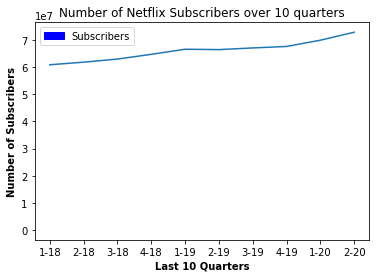

In [240]:
#Plot
width = 0.2
pos = np.arange(len(df_s))

plt.plot(pos, df_s, width)
plt.xlabel("Last 10 Quarters",fontweight='bold')
plt.xticks(np.arange(10), ('1-18', '2-18', '3-18', '4-18', '1-19',
                          '2-19', '3-19', '4-19', '1-20', '2-20',))
plt.ylabel('Number of Subscribers',fontweight='bold')

blue = patch.Patch(color="blue", label="Subscribers")

plt.title("Number of Netflix Subscribers over 10 quarters")
plt.legend(handles=[blue])
plt.show()

The graph just helps visualize the increase in subscriber count over the past ten quarters. It is evident that starting the first quarter of 2020 (x-label: 1-20), the slope is greater. Although it may not seem like a significant increase, the y-axis is in terms of 10^7. So a small increase is actual very significant.

- ### Revenue <br><br>
Netflix publicly provides their quarterly revenue statements, so we took those and used them to analyze the relationship between COVID's spread and the increase in revenue. 

In [241]:
#Select Data specific to United States and Transpose it
df_r=df_revenue.set_index('Region')
df_r = df_revenue.transpose()
df_r = df_r.iloc[1:, [0]]
df_r = df_r.loc[['Q1 2018 Revenue','Q2 2018 Revenue','Q3 2018 Revenue',
                 'Q4 2018 Revenue','Q1 2019 Revenue','Q2 2019 Revenue',
                 'Q3 2019 Revenue','Q4 2019 Revenue','Q1 2020 Revenue','Q2 2020 Revenue'], :]
df_r.columns =['United_States']

In [242]:
#Summary Statistics
stat_rev = df_r.United_States
stat_revtemp = stat_rev.iloc[1:]
stat_revtemp = stat_revtemp.reset_index()
temp_one = stat_revtemp['United_States']
difflist_one = []
for index in range(len(temp_one)):
    diff_one = temp_one[index] - stat_rev[index]
    difflist_one.append(diff_one)
    
print("Summary Statistics(Change in Quarterly Revenue in Dollars)")
print("Min: " + str(min(difflist_one)))
print("Max: " + str(max(difflist_one)))
print("Mean: " + str("{:.2f}".format(sum(difflist_one)/len(difflist_one))))
print("Standard Deviation: " + str("{:.2f}".format(statistics.stdev(difflist_one))))

Summary Statistics(Change in Quarterly Revenue in Dollars)
Min: 30868000.0
Max: 244348000.0
Mean: 95945888.89
Standard Deviation: 65697775.59


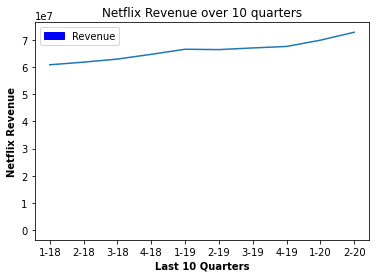

In [243]:
#Plot
width = 0.2
pos = np.arange(len(df_s))

plt.plot(pos, df_s, width)
plt.xlabel("Last 10 Quarters",fontweight='bold')
plt.xticks(np.arange(10), ('1-18', '2-18', '3-18', '4-18', '1-19',
                          '2-19', '3-19', '4-19', '1-20', '2-20',))
plt.ylabel('Netflix Revenue',fontweight='bold')

blue = patch.Patch(color="blue", label="Revenue")

plt.title("Netflix Revenue over 10 quarters")
plt.legend(handles=[blue])
plt.show()

The two cells above demonstrate the summary statistics for change in quarterly Netflix subscribers and the visualization of Netflix subscribers over the past 10 quarters. As you can see, Netflix lost some of its subscribers in certain quarters but gained in most of the quarters by average of 1,332,777. The graph proves that the number of subscribers tended to constantly increase over the past 10 quarters, showing a heavier increase in the past year.

### 4-B. Relationship between US COVID Cases and Mobility <a id='4.B'></a>

Regression slope: -0.00144
R-squared value: 0.78196

Pearson Correlation Coefficient: -0.88


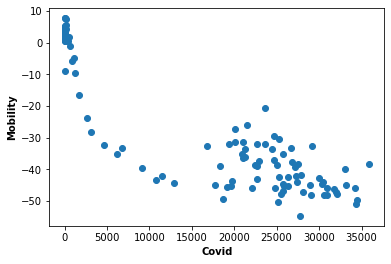

In [244]:
plt.xlabel('Covid',fontweight='bold')
plt.ylabel('Mobility',fontweight='bold')
plt.scatter(df_covid['positiveIncrease'],df_mobility['avg'],alpha=1)

model_1 = LinearRegression().fit(df_covid[['positiveIncrease']], df_mobility['avg'])
print("Regression slope: {:.5f}".format(model_1.coef_[0]))
print("R-squared value: {:.5f}".format(model_1.score(df_covid[['positiveIncrease']], df_mobility['avg'])))

#Confidence Check
pearson_one = "{:.2f}".format(pearsonr(df_covid['positiveIncrease'], df_mobility['avg'])[0])
print("\nPearson Correlation Coefficient: " + str(pearson_one))

As you can see from the scatterplot above, there is an evident trend in data for the relationship between US COVID cases and mobility. The graph demonstrates that as COVID cases surge, the population's mobility generally decreases. In other words, people tend to travel less for retail, recreation, transit, and commuting purposes as positive COVID cases increase. The Pearson Correlation Coefficient of -0.88 demonstrates that there is a strong negative correlation between the two variables because it is less than -0.7. If we model this relationship using a linear regression, we get a slope of -0.00144 and a r-squared value of 0.78196. We would have to say that the two variables have a non-linear correlation because the slope is very close to zero while there is strong negative correlation. The reason why the datapoints seem non-linear is because, in terms of mobility, people became less sensitive to the increase of COVID cases as they get into later phases of the pandemic. Our linear model's r-squared value of 0.78 shows that our model is capable of explainig most of the variability in our output variable. Therefore, it is sufficient to make a statement that the increased number of positive COVID cases contributed to a decreased mobility of the population.

### 4-C. Relationship between Mobility and Netflix Google Search Trends <a id='4.C'></a>

Regression slope: -0.49816
R-squared value: 0.44962

Pearson Correlation Coefficient: -0.67


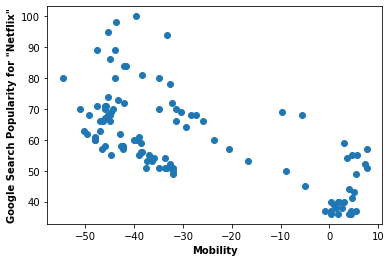

In [245]:
plt.xlabel('Mobility',fontweight='bold')
plt.ylabel('Google Search Popularity for "Netflix"',fontweight='bold')
plt.scatter(df_mobility['avg'],df_googlesearch['Search Popularity'],alpha=1)

model_2 = LinearRegression().fit(df_mobility[['avg']],df_googlesearch['Search Popularity'])
print("Regression slope: {:.5f}".format(model_2.coef_[0]))
print("R-squared value: {:.5f}".format(model_2.score(df_mobility[['avg']],df_googlesearch['Search Popularity'])))

#Confidence Check
pearson_one = "{:.2f}".format(pearsonr(df_mobility['avg'], df_googlesearch['Search Popularity'])[0])
print("\nPearson Correlation Coefficient: " + str(pearson_one))

As you can see from the scatterplot above, there is a manifest trend in data for the relationship between mobility and Google Search Trends for the term Netflix. The scatterplot demonstrates that as average mobility decreases, the Google Search popularity for "Netflix" increases accordingly, which indicates an inverse relationship. In other words, people tend to more frequently searh "Netflix" on Google Search Engine as they stay at home longer. The Pearson Correlation Coefficient of -0.67 demonstrates that there is a moderate negative correlation between the two variables because it is less than -0.5 but is greater than -0.7, which still shows a good amount of correlation. If we model this relationship using a linear regression, we get a slope of -0.49816 and a r-squared value of 0.44962. These parameters indicate that the two variables have a linear negative correlation. Our linear model's r-squared value of 0.44962 might seem like it isn't strong enought to explain most of the variability in our output variable. However, considering that both of the datasets contain data related to human behavior, we can still say that it does explain a lot of variability in our output variable. In conclusion, we have sufficient evidence to argue that the decreased mobility contributed to an increased popularity of "Netflix" in Google Search trends.

### 4-D. Relationship between Mobility and Average Screentime (Supporting Evidence)

In [246]:
#Before & After -> 3/13 -> from the survey + first negative mobility
#Mobility Before & After Covid
mobility_before_covid = df_mobility[df_mobility['date'] <= '2020-03-13']['avg'].mean()
mobility_after_covid = df_mobility[df_mobility['date'] > '2020-03-13']['avg'].mean()
data_mobility = np.array([mobility_before_covid , mobility_after_covid]) 

series_mobility = pd.Series(data_mobility) 

#Screentime Before & After Covid
screentime_before_covid = ((0.5*16)+(2.5*44)+(4.5*23)+(6.5*7)+(8.5*4)+(10*6))/100
screentime_after_covid = ((0.5*12)+(2.5*19)+(4.5*28)+(6.5*20)+(8.5*11)+(10*11))/100
data_screentime = np.array([screentime_before_covid , screentime_after_covid]) 

series_screentime = pd.Series(data_screentime)

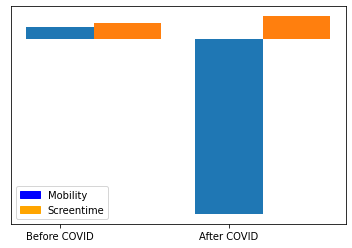

In [247]:
width = 0.4
pos1 = np.arange(len(series_mobility))
pos2 = [x + width for x in pos1]

plt.bar(pos1, series_mobility, width)
plt.bar(pos2, series_screentime, width)

plt.xticks(np.arange(2), ['Before COVID', 'After COVID'])  # Set text labels.
plt.yticks([])

blue = patch.Patch(color="blue", label="Mobility")
orange = patch.Patch(color="orange", label="Screentime")

plt.legend(handles=[blue, orange])
plt.show()

We would like to utilize the relationship between mobility data and average screentime data as a supporting evidence for our argument. As you previously saw in the [Average Screentime](#average_screentime) analysis, there was an increase in the average screentime for people living in the United States after the pandemic compared to the times before the pandemic. In this section, we tried to link what we've found to mobility data by creating a juxtaposed bar plot. Since the average screentime data divided pre and post pandemic at mid-march, we also divided the mobility data at the same date and compared the pre and post pandemic data. The comparison in the bar plot demonstrated that mobility dropped significantly while, at the same time, average screentime increased for many people. This discovery may not be strong enough to be used as an argument, but it definitely shows an ongoing tendency. We thought this might be significant because increased average screentime could mean more time spent on online streaming services like Netflix.

### 4-E. Relationship between Netflix Google Search Trends and Netflix Subscribers

In this section we will observe the relationship between Google search trends and its correlation to increase in Netflix subscribers. Google trends is an online resource that “allows users to retrieve relative search volumes over a set time period for specific keyword search queries.” (S.L.France) In this case we used the keyword “Netflix” with the location set to the United States from February 15th to June 30th (Refer to [Limitation 1](#limitations_one)).  According to an article from Yahoo Finance, the correlation coefficient between subscriber growth and Netflix searches was in between 0.93 and 0.94. (YahooF) A coefficient of 1 represents a perfectly linear relationship, therefore a value of 0.93/0.94 is extremely high. Looking closer, the graph in [4-A](#google_netflix) shows a significant spike after the red vertical line (March 13th), which roughly corresponds to the beginning of the shutdown orders and quarantine. Due to the high correlation between increase in searches and increase in subscribers, we can conclude that the surge in “Netflix” searches corresponds to the subscription growth. 

### 4-F. Subscribers is related to Revenue <a id='4.F'></a>

Regression slope: 80.15141
R-squared value: 0.87623

Pearson Correlation Coefficient: 0.94


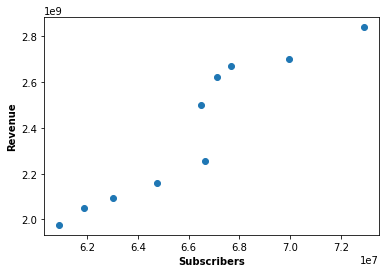

In [248]:
plt.xlabel('Subscribers',fontweight='bold')
plt.ylabel('Revenue',fontweight='bold')
plt.scatter(df_s.United_States,df_r.United_States,alpha=1)

model_3 = LinearRegression().fit(df_s[['United_States']], df_r['United_States'])
print("Regression slope: {:.5f}".format(model_3.coef_[0]))
print("R-squared value: {:.5f}".format(model_3.score(df_s[['United_States']], df_r['United_States'])))

#Confidence Check
pearson_one = "{:.2f}".format(pearsonr(df_s['United_States'], df_r['United_States'])[0])
print("\nPearson Correlation Coefficient: " + str(pearson_one))

As you can see from the scatterplot above, there is an obvious trend in data for the relationship between the number of Netflix subscribers and Netflix's reported revenue. The scatterplot demonstrates that as the number of Netflix subscribers increases, the company's reported revenue increases accordingly. In other words, more subscribers mean more revenue. The Pearson Correlation Coefficient of 0.94 shows a very strong positive correlation (almost perfect) between the two variables because it is very close to 1. If we model this relationship using a linear regression, we get a slope of 80.15141 and a r-squared value of 0.87623. These parameters indicate that the two variables have a linear positive correlation. Our linear model's r-squared value of 0.87623 shows that our model is capable of explainig most of the variability in our output variable. Therefore, we contend that the number of Netflix subscribers has a positive linear relationship with Netflix's reported revenue.

# <font color="blue">5. Evaluation of Significance</font>

In order to evaluate the significance of the patterns we got in our analysis above, we are going to use the random permutation method. We will randomly permute the output variable each time we fit a new linear regression in our significance test so that we can have a new set of 1000 randomized slopes to compare with the original slope.

In [249]:
#Permutation method
def mix(x):
    mixed = np.random.permutation(x.copy())
    return mixed

### 5-A. Evaluation of Significance for [4.B](#4.B)

In [250]:
#Generate Permuted Slopes
new_slopes_1 = np.zeros(1000)
for i in range(1000):
    model = LinearRegression().fit(df_covid[['positiveIncrease']], mix(df_mobility['avg']).reshape(-1,1))
    new_slopes_1[i] = model.coef_[0]

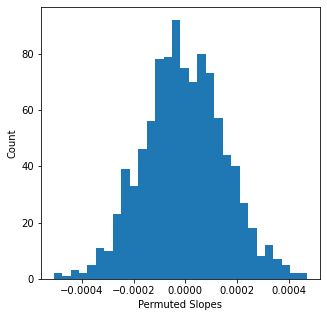

In [251]:
#Plot Permuted Slopes
plt.figure(figsize=(5,5))
plt.xlabel("Permuted Slopes")
plt.ylabel("Count")
plt.hist(new_slopes_1, bins = 30)
plt.show()

- Original slope: -0.00144 <br><br>
As we can see from the range of permuted slopes in the graph, our original slope is way too small to fit anywhere in the graph. Therefore, we can conclude that our original slope is not generated by any random chance, thus being statistically significant.

### 5-B. Evaluation of Significance for [4.C](#4.C)

In [252]:
#Generate Permuted Slopes
new_slopes_2 = np.zeros(1000)
for i in range(1000):
    model = LinearRegression().fit(df_mobility[['avg']], mix(df_googlesearch['Search Popularity']).reshape(-1,1))
    new_slopes_2[i] = model.coef_[0]

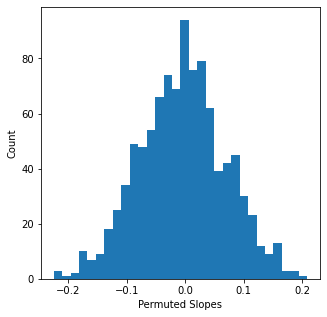

In [253]:
#Plot Permuted Slopes
plt.figure(figsize=(5,5))
plt.xlabel("Permuted Slopes")
plt.ylabel("Count")
plt.hist(new_slopes_2, bins = 30)
plt.show()

- Original slope: -0.49816 <br><br>
As we can see from the range of permuted slopes in the graph, our original slope is way too small to fit anywhere in the graph. Therefore, we can conclude that our original slope is not generated by any random chance, thus being statistically significant.

### 5-C. Evaluation of Significance for [4.F](#4.F)

In [254]:
#Generate Permuted Slopes
new_slopes_3 = np.zeros(1000)
for i in range(1000):
    model = LinearRegression().fit(df_s[['United_States']], mix(df_r['United_States']).reshape(-1,1))
    new_slopes_3[i] = model.coef_[0]

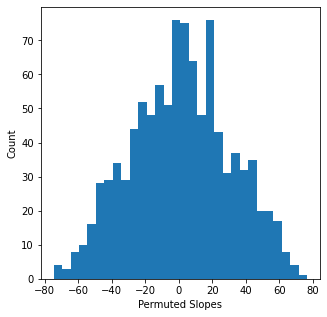

In [255]:
#Plot Permuted Slopes
plt.figure(figsize=(5,5))
plt.xlabel("Permuted Slopes")
plt.ylabel("Count")
plt.hist(new_slopes_3, bins = 30)
plt.show()

- Original slope: 80.15141 <br><br>
As we can see from the range of permuted slopes in the graph, our original slope is way too large to fit anywhere in the graph. Therefore, we can conclude that our original slope is not generated by any random chance, thus being statistically significant.

# <font color="blue">6. Interpretation and Conclusion</font>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that we have run all our tests and received the data, we can make our conclusions and back them with evidence. Our first test observed the relationship between daily COVID cases and mobility in the US in the following sectors (Retail and Recreation, Transit Stations, and Workplace). This yield a correlation coefficient of **-0.88**. This value means that there is a relatively strong negative relationship between daily COVID cases and mobility, meaning as COVID cases increased, mobility in those sectors most likely decreased. We then moved to mobility and Google Search Trends which gave a correlation of **-0.67**. Although the correlation is weaker than the COVID cases and mobility datasets, a value of -0.67 still proves a relatively strong negative relationship. This allows us to connect these two individual tests and conclude that ```increase in COVID cases is correlated to increase in Google searches for Netflix.```<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We moved away from statistical testing and into more research. By using multiple articles, we were able to come to the reasoning that the ```Google Search Trends could predict the increase or decrease in subscriber count for Netflix.```<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We then analyzed the correlation between Netflix subscribers and Netflix' revenue. We confirmed our hypothesis that an increase in Netflix subscribers would directly correlate to increase in Netflix revenue because Netflix is an ad-free streaming service (meaning that subscribers are their main source of revenue). This correlation coefficient came out to be **0.94** which is considered extremely high. This solidifies that ```Netflix subscriber count and Netflix' revenue have a very strong correlation.```<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now we can walk through the connections. Since COVID cases increasing correlated to Google Search Trends for Netflix increasing and the increase in Google Search Trends can help predict the subscriber count for Netflix, we can say that the increase in COVID cases is positively correlated to the increase in Netflix subscriber counts. From there, because we proved the subscriber count is related to Netflix' revenue, we can conclude that the increase in daily COVID cases had a significant effect on Netflix' revenue. Finally we can tie all our conclusions together and say: **```The increase in daily COVID cases had an effect on the time spent on Netflix and the companies revenue.```**

# <font color="blue">7. Data Limitations</font>

### Limitations <br>
<a id='limitations_one'></a>
1) **How people dealt with COVID, in terms of mobility, after the first months** <br>
During the beginning of COVID-19, around January - March, people were heavily restricted and seemed to care a lot about not spreading the virus. As the cases began to decrease, possibly due to the decreased mobility, and stores began to reopen, citizens were less cautious. The decreased care for safety (wearing masks, moving around to non-essential places) and desire to stop quarantining probably led to mobility increasing again. This may have caused COVID to spike again.<br><br>
<a id='limitations_two'></a>
2) **Screentime may not represent general population** <br>
The screentime data was a sample of 899 parents which does not cover all of the US population. Regions may differ in screentime, but due to the relatively large sample size (one of the largest sample sizes we could find for screentime data), we used this data for our analysis.<br><br>
3) **Daily subscriber data not available to public** <br>
Since the the daily increase/decrease in subscribers for Netflix is not open to the public, we could only gather quarterly reports to use as data. This proves to be a limitation because most of our other data has daily information and assuming correlation/linear regression through two data points (Q1 and Q2 of 2020) is not the most ideal approach.<br><br>
4) **Google Search Trends is a limited tool** <br>
Google Search Trends is a little bit limited because the values are given through a relative search scale from 1-100 and may not be consistent across multiple searches and keywords.<br><br>
5) **Subscribers could be sharing accounts** <br>
Oftentimes friends and family all share accounts for streaming platforms which can result in an inaccurate number of total subscribers. This basically means that for every subscriber there could be one person using it or five people using it or even more. This is something we can not control because there would not be any data for shared accounts. This may also affect total revenue and stock data because less people are paying for their subscription. <br><br>
6) **What are the biases in your data or assumptions of your analyses that specifically affect the conclusions you’re able to draw?** <br>
The potential biases are that the average screen time may have a big range because there is a gap between certain groups that have high average screen time and low average screen time. The average screen time does not perfectly match the average usage of streaming platforms. <br><br>

# <font color="blue">8. Source Code</font>

https://github.com/bungaepyo/info2950-project

# <font color="blue">9. Acknowledgements</font>

- **Article 1**<br>
There are many articles about the effect of Coronavirus on the world. Unlike data collections from kaggle, articles from "The Washington Post", it describes how much people in each United States' region spend their time at their houses. It also compares with how much time people in different country spends their time at home, which helps to understand how effectively United States is facing Coronavirus compared to other countries.<br> https://www.washingtonpost.com/graphics/2020/national/map-us-still-staying-home-coronavirus/<br><br>

- **Article 2**<br>
This article gave evidence for Google Trends being able to predict Netflix subscriber growth.<br>
https://finance.yahoo.com/news/google-trends-surprisingly-good-way-predict-netflix-subscriber-growth-142200691.html<br><br>

- **Article 3**<br>
Obtained from the online Cornell Library database, specifically ScienceDirect, this scholarly article went in depth on how Google Trends could help predict certain outcomes. <br>
https://www.sciencedirect.com/science/article/pii/S0148296320306718<br><br>

- **Article 4**<br>
Another article on how Google Trends could help predict outcomes of companies and revenue. <br>
https://seekingalpha.com/article/4338135-google-trends-search-analysis-of-amazon-netflix-and-tesla<br><br>

- **News** <br>
 We also found a News about how much more time people are spending at home compared to spending time on other activities. This News shows graphs of time spent in groceries and pharmacies, in parks, in work places, and in transit stations. Through these graphs, we were able to assume which businesses are thriving and which businesses are declining. As people are spending less time at recreational areas, people are seeking for entertainments that they can do at home such as watching TV shows. Thus, unlike data collections that only show certain sourcfes, News helped us to understand the circumstances of people after COVID-19 pandemic.<br> 
 https://www.aljazeera.com/news/2020/4/6/coronavirus-how-much-more-time-are-people-spending-at-home<br><br>

- **Peers**<br>
 Since COVID-19 is a global pandemic currently affecting more than 200 countries, it was easy to ask questions to friends around us. We asked some of our friends who are in quarantined about what their doing during most of their quaratine. Most of the usual means of entertainment are off and they cannot go outside either. So, most of them said that they spend their time on internet. They all said that they watch popular movies and shows on Netflix. This correlates with our research questions how the novel covonavirus pandemic affected Netflix's business in terms of time spent on Netflix and its revenue. As people time spent at their homes increases, the Netflix's business successed due to increase in users. 
 

# <font color="blue">10. Appendix</font>

A Data Cleaning Description file is included in the same directory under the name of **INFO2950 Project Appendix - Data Cleaning.ipynb**.

# Question for Reviewers

- Was it hard to follow along our analysis logic
- For summary statistics, should we restate what they mean in the markdown below our graph? We think they are self-explanatory, but if clarification is needed we can definitely put it in.
- Because there is no public data for subscriber count that is not quarterly, we only have two numbers for subscriber count (which we added as a limitation). We did research, using some articles, to show that subscriber count could be predicted using Google search trends. Is this valid reasoning?